# Lab 02 Tasks

The dataset used for this is a **character network**, representing the relationships between characters in George R. R. Martin's book *A Storm of Swords*, the third novel in his series *A Song of Ice and Fire*. The strength of the relationships between characters are calculated based on how many times two characters' names appeared within 15 words of one another in the book. 

This data was originally compiled by A. Beveridge and J. Shan. See [here](http://mlg.ucd.ie/modules/COMP30850/network_of_thrones.pdf) for more details on this network.

### Task 1

Load the network from the GEXF file game-of-thrones.gexf, and examine the following aspects of the network:

- What type of network is this?
- How many nodes and edges are in the network?
- What are the identifiers of the node in the network?
- How connected is the network?

In [2]:
import networkx as nx

g = nx.read_gexf("lab02-data/game-of-thrones.gexf")

In [3]:
#What Type of Network?
g.is_directed()

False

In [4]:
print("The Network has %d nodes and %d edges" % (g.number_of_nodes(), g.number_of_edges()))

The Network has 107 nodes and 352 edges


In [5]:
list(g.nodes())

['Aemon',
 'Grenn',
 'Samwell',
 'Aerys',
 'Jaime',
 'Robert',
 'Tyrion',
 'Tywin',
 'Alliser',
 'Mance',
 'Amory',
 'Oberyn',
 'Arya',
 'Anguy',
 'Beric',
 'Bran',
 'Brynden',
 'Cersei',
 'Gendry',
 'Gregor',
 'Joffrey',
 'Jon',
 'Rickon',
 'Roose',
 'Sandor',
 'Thoros',
 'Balon',
 'Loras',
 'Belwas',
 'Barristan',
 'Illyrio',
 'Hodor',
 'Jojen',
 'Luwin',
 'Meera',
 'Nan',
 'Theon',
 'Brienne',
 'Bronn',
 'Podrick',
 'Lothar',
 'Walder',
 'Catelyn',
 'Edmure',
 'Hoster',
 'Jeyne',
 'Lysa',
 'Petyr',
 'Robb',
 'Roslin',
 'Sansa',
 'Stannis',
 'Elia',
 'Ilyn',
 'Meryn',
 'Pycelle',
 'Shae',
 'Varys',
 'Craster',
 'Karl',
 'Daario',
 'Drogo',
 'Irri',
 'Daenerys',
 'Aegon',
 'Jorah',
 'Kraznys',
 'Missandei',
 'Rakharo',
 'Rhaegar',
 'Viserys',
 'Worm',
 'Davos',
 'Cressen',
 'Salladhor',
 'Eddard',
 'Eddison',
 'Gilly',
 'Qyburn',
 'Renly',
 'Tommen',
 'Janos',
 'Bowen',
 'Kevan',
 'Margaery',
 'Myrcella',
 'Dalla',
 'Melisandre',
 'Orell',
 'Qhorin',
 'Rattleshirt',
 'Styr',
 'Val',
 

In [7]:
nx.number_connected_components(g)

1

### Task 2

Based on the edge weights in the network, perform the following:

- Plot the edge weight distribution for the network.
- Identify the top 10 pairs of characters with the strongest associations (i.e. highest edge weights).

In [9]:
#Build dictionary from edge weights
weights = {}
for node1, node2, data in g.edges(data=True):
    weights[(node1, node2)] = data["weight"]


In [10]:
import pandas as pd
weights_s = pd.Series(weights)

weights_s

Aemon        Grenn            5.0
             Samwell         31.0
             Jon             30.0
             Robert           4.0
             Stannis          4.0
                             ... 
Dalla        Val              7.0
Qhorin       Rattleshirt      6.0
             Ygritte          7.0
Rattleshirt  Ygritte          9.0
Marillion    Robert Arryn     4.0
Length: 352, dtype: float64

Text(0.5, 0, 'Weight')

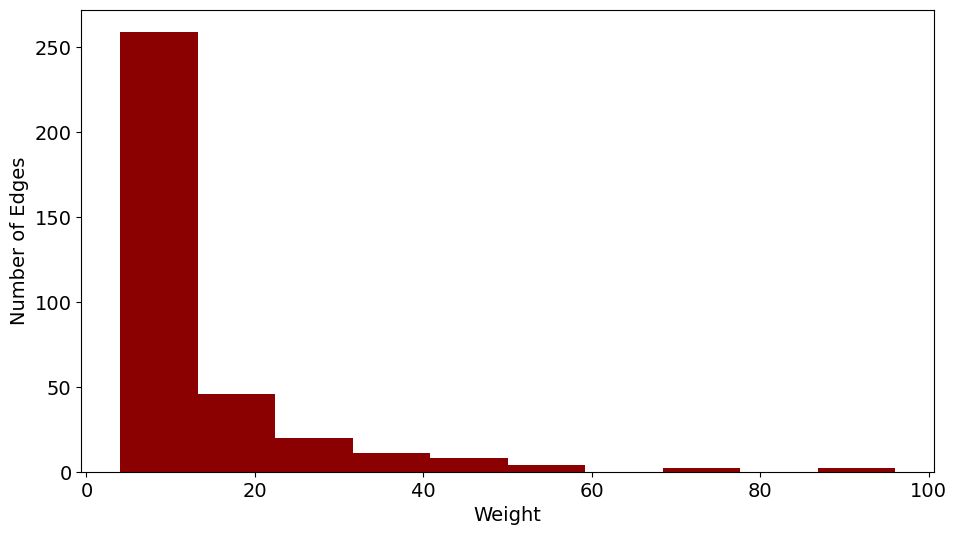

In [11]:
ax = weights_s.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkred")
ax.set_ylabel("Number of Edges", fontsize=14)
ax.set_xlabel("Weight", fontsize=14)

In [12]:
weights_s.sort_values(ascending=False).head(10)

Bran      Hodor      96.0
Jaime     Brienne    88.0
Tyrion    Sansa      77.0
Mance     Jon        69.0
Tyrion    Joffrey    54.0
Jon       Ygritte    54.0
Bran      Meera      54.0
Samwell   Jon        52.0
Daenerys  Jorah      47.0
Tyrion    Cersei     46.0
dtype: float64

### Task 3

Create a new unweighted version of the network, where only edges with weights >= 15 from the original network are preserved (i.e. pairs of characters must be mentioned together at least 15 times). Exclude nodes which do not have any remaining edges in the new network.

For this new unweighted network:

- Identify the number of nodes and edges
- Identify the number of connected components
- Draw a simple network diagram of the full network
- Draw a simple network diagram of only the largest component

In [13]:
g1 = nx.Graph()
for node1, node2, data in g.edges(data=True):
    if data["weight"] >= 15:
        g1.add_edge(node1, node2)

In [14]:
print("The Network has %d nodes and %d edges" % (g1.number_of_nodes(), g1.number_of_edges()))

The Network has 61 nodes and 86 edges


In [17]:
nx.number_connected_components(g1)

3

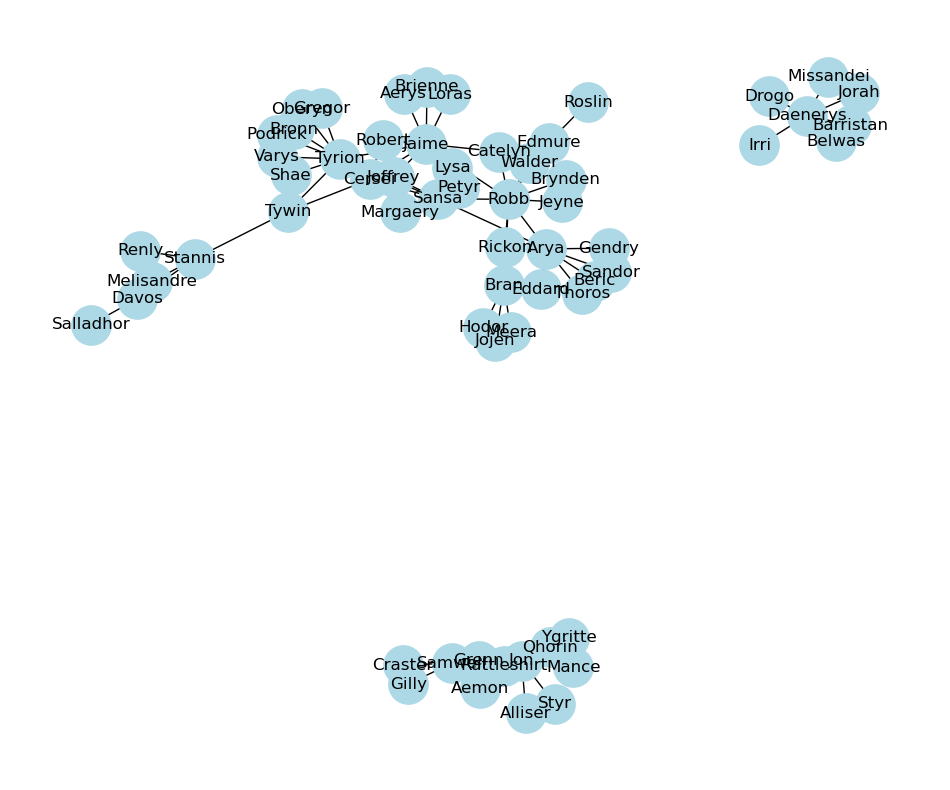

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
nx.draw_networkx(g1, with_labels=True, node_size=800, node_color="lightblue")
plt.axis("off")
plt.show()

In [19]:
comp_nodes = sorted(nx.connected_components(g1), key=len, reverse=True)

largest_comp_nodes = comp_nodes[0]
len(largest_comp_nodes)

42

In [20]:
sg = nx.subgraph(g1, largest_comp_nodes)

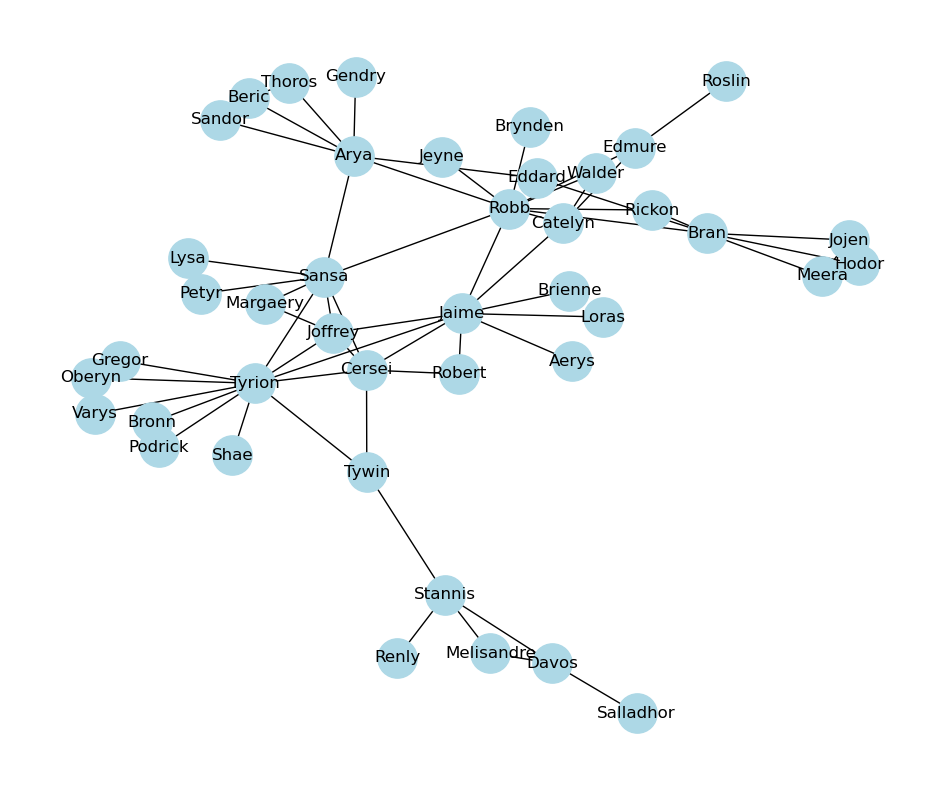

In [21]:
plt.figure(figsize=(12,10))
nx.draw_networkx( sg, with_labels=True, node_size=800, node_color="lightblue" )
plt.axis("off")
plt.show()